In [2]:
import pandas as pd

In [9]:
file_path=r"C:\Users\ujjwa\OneDrive\exchange_rate.csv"

In [12]:
df =  pd.read_csv(file_path)

In [13]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [24]:
print(df.columns)

Index(['date', 'Ex_rate'], dtype='object')


In [14]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [23]:
print(df.columns)

Index(['date', 'Ex_rate'], dtype='object')


In [16]:
import matplotlib.pyplot as plt

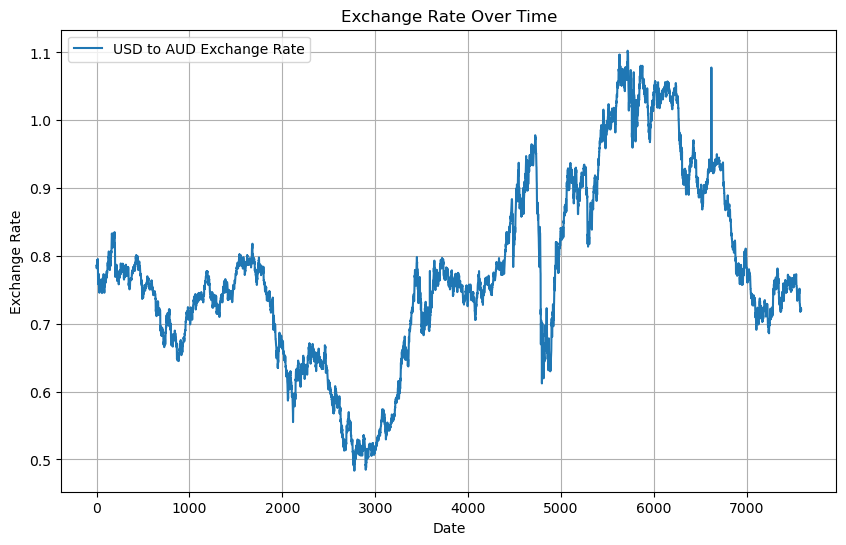

In [27]:
# Plot the time series for the exchange rate
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Step 4: Fit Holt-Winters Exponential Smoothing model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()

In [31]:
hw_model

In [32]:
hw_fit

In [33]:
# Step 5: Print model summary
print("Holt-Winters Model Summary:")
print(hw_fit.summary())

Holt-Winters Model Summary:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.611
Trend:                         Additive   BIC                         -77513.662
Seasonal:                      Additive   AICC                        -77624.520
Seasonal Periods:                    12   Date:                 Tue, 11 Feb 2025
Box-Cox:                          False   Time:                         09:38:11
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8700942                alpha                 Tr

In [34]:
# Step 6: Forecasting using Holt-Winters model
hw_forecast = hw_fit.forecast(steps=12)  # Forecast for the next 12 months

In [35]:
hw_forecast 

7588    0.720845
7589    0.720641
7590    0.720317
7591    0.720596
7592    0.720431
7593    0.720569
7594    0.720645
7595    0.720360
7596    0.720548
7597    0.720587
7598    0.720566
7599    0.720817
dtype: float64

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_11328\2951116936.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], hw_forecast, label='Holt-Winters Forecast', linestyle='--')


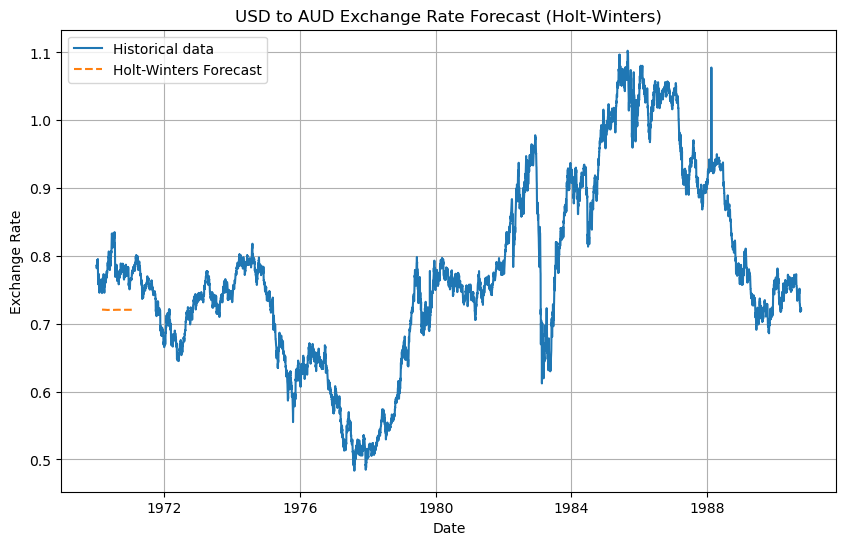

In [39]:
# Plot the forecast against the actual data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical data')
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], hw_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('USD to AUD Exchange Rate Forecast (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Step 7: ARIMA model - Parameter Selection using ACF and PACF
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


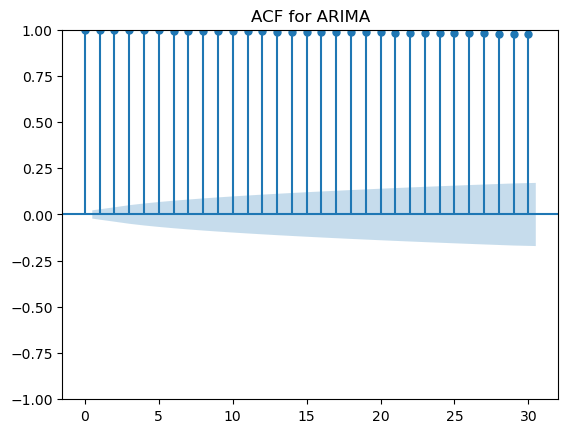

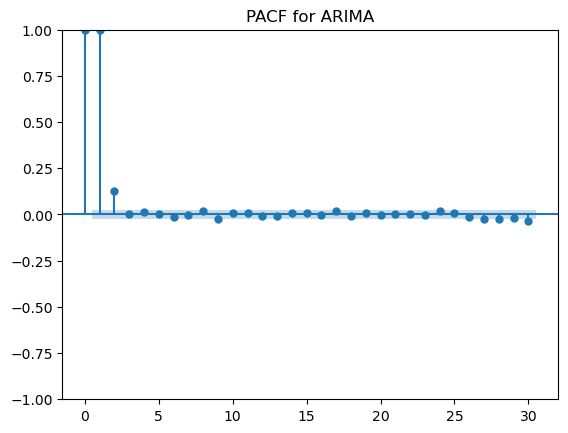

In [44]:
plot_acf(df['Ex_rate'], lags=30)
plt.title('ACF for ARIMA')
plt.show()

plot_pacf(df['Ex_rate'], lags=30)
plt.title('PACF for ARIMA')
plt.show()

In [46]:
# Based on ACF and PACF, select p, d, q values (for this example, p=1, d=1, q=1)
arima_model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
arima_fit = arima_model.fit()


In [47]:
arima_model 

In [48]:
arima_fit

In [49]:
# Step 8: Print ARIMA model summary
print("ARIMA Model Summary:")
print(arima_fit.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 11 Feb 2025   AIC                         -56102.322
Time:                        09:42:34   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-0

In [50]:
# Step 9: Forecasting using ARIMA model
arima_forecast = arima_fit.forecast(steps=12)  # Forecast for the next 12 months

In [51]:
arima_forecast

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
Name: predicted_mean, dtype: float64

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_11328\3403350405.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], arima_forecast, label='ARIMA Forecast', linestyle='--')


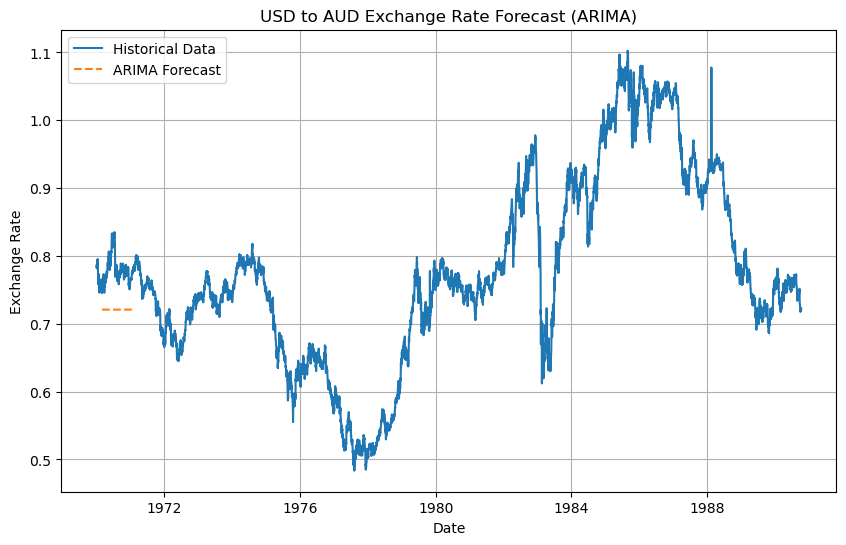

In [54]:
# Plot the ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical Data')
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('USD to AUD Exchange Rate Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
#step10 Model Evaluation using MAE, RMSE, and MAPE
# Actual values for the next 12 months (you will need actual data for comparison)
import numpy as np

# For now, we will compare the forecasts only
actual_values = np.random.rand(12)  # Replace with actual values if available

In [57]:
actual_values

array([0.20739717, 0.44733876, 0.35255543, 0.3999348 , 0.42853714,
       0.95592724, 0.13306081, 0.90954107, 0.68230402, 0.32075862,
       0.00930038, 0.2404849 ])

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
# Holt-Winters Error Metrics
hw_mae = mean_absolute_error(actual_values, hw_forecast)
hw_rmse = np.sqrt(mean_squared_error(actual_values, hw_forecast))
hw_mape = np.mean(np.abs((actual_values - hw_forecast) / actual_values)) * 100

In [61]:
hw_mae

0.3674049248824292

In [62]:
hw_rmse

0.407837482171861

In [63]:
hw_mape

752.1639879002868

In [64]:
# ARIMA Error Metrics
arima_mae = mean_absolute_error(actual_values, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(actual_values, arima_forecast))
arima_mape = np.mean(np.abs((actual_values - arima_forecast) / actual_values)) * 100

In [65]:
arima_mae

0.36753387470477344

In [66]:
arima_rmse 

0.4079748371558674

In [67]:
arima_mape



752.4395765570831

In [68]:
# Step 11: Model Comparison
print("Model Comparison Summary:")
print(f"Holt-Winters MAE: {hw_mae}, RMSE: {hw_rmse}, MAPE: {hw_mape}")
print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}")


Model Comparison Summary:
Holt-Winters MAE: 0.3674049248824292, RMSE: 0.407837482171861, MAPE: 752.1639879002868
ARIMA MAE: 0.36753387470477344, RMSE: 0.4079748371558674, MAPE: 752.4395765570831


In [ ]:
Notes:
Replace the actual_values placeholder with real actual exchange rate data for proper evaluation of the models.
You can fine-tune the ARIMA and Holt-Winters models by adjusting their parameters based on your analysis of the ACF/PACF plots or seasonality in your dataset.
